In [91]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import keras.utils
import numpy as np
from keras.models import load_model
import matplotlib.pyplot as plt

In [92]:
epochs = 100
batch_size = 50
filename = "epochs_" + str(epochs) +"_batchsize_" + str(batch_size) + "_sgd_momentum_0.1_784_sigmoid_100_sigmoid_10_softmax_crossentropy"
print (filename)

epochs_100_batchsize_50_sgd_momentum_0.1_784_sigmoid_100_sigmoid_10_softmax_crossentropy


In [93]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [94]:
n_train = len(x_train)
n_test = len(x_test)

l1 = len(x_train[0])
l2 = len(x_train[0][0])

In [95]:
x_train = np.reshape(x_train,(n_train,l1*l2))
x_test = np.reshape(x_test,(n_test,l1*l2))
 
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

input_dim = len(x_train[0])

In [96]:
model = Sequential()
model.add(Dense(784, input_dim=input_dim, activation = 'sigmoid'))
model.add(Dense(100, input_dim=input_dim, activation = 'sigmoid'))
model.add(Dense(10, activation='softmax'))

#optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.9, decay=1e-6, nesterov=True)
#optimizer = keras.optimizers.Adagrad(lr=0.01,decay=0.5,epsilon=0.2)
#optimizer = 'adam'
optimizer =  keras.optimizers.SGD(lr=0.01, momentum = 0.1)

In [97]:
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [98]:
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,validation_split= 0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 18s 371us/step - loss: 1.0964 - acc: 0.7805 - val_loss: 0.5749 - val_acc: 0.8867
Epoch 2/100
48000/48000 [==============================] - 16s 333us/step - loss: 0.4788 - acc: 0.8941 - val_loss: 0.3772 - val_acc: 0.9107
Epoch 3/100
48000/48000 [==============================] - 16s 330us/step - loss: 0.3517 - acc: 0.9136 - val_loss: 0.3065 - val_acc: 0.9229
Epoch 4/100
48000/48000 [==============================] - 16s 328us/step - loss: 0.2926 - acc: 0.9245 - val_loss: 0.2683 - val_acc: 0.9298
Epoch 5/100
48000/48000 [==============================] - 16s 336us/step - loss: 0.2568 - acc: 0.9331 - val_loss: 0.2433 - val_acc: 0.9350
Epoch 6/100
48000/48000 [==============================] - 17s 347us/step - loss: 0.2302 - acc: 0.9388 - val_loss: 0.2253 - val_acc: 0.9392
Epoch 7/100
48000/48000 [==============================] - 18s 381us/step - loss: 0.2076 - acc: 0.9451 - val_l

Epoch 59/100
48000/48000 [==============================] - 14s 294us/step - loss: 0.0089 - acc: 0.9990 - val_loss: 0.0963 - val_acc: 0.9708
Epoch 60/100
48000/48000 [==============================] - 14s 293us/step - loss: 0.0086 - acc: 0.9991 - val_loss: 0.0964 - val_acc: 0.9708
Epoch 61/100
48000/48000 [==============================] - 14s 296us/step - loss: 0.0084 - acc: 0.9990 - val_loss: 0.0966 - val_acc: 0.9711
Epoch 62/100
48000/48000 [==============================] - 14s 294us/step - loss: 0.0082 - acc: 0.9991 - val_loss: 0.0964 - val_acc: 0.9713
Epoch 63/100
48000/48000 [==============================] - 14s 293us/step - loss: 0.0080 - acc: 0.9991 - val_loss: 0.0967 - val_acc: 0.9710
Epoch 64/100
48000/48000 [==============================] - 14s 294us/step - loss: 0.0079 - acc: 0.9991 - val_loss: 0.0964 - val_acc: 0.9711
Epoch 65/100
48000/48000 [==============================] - 14s 297us/step - loss: 0.0077 - acc: 0.9991 - val_loss: 0.0968 - val_acc: 0.9712
Epoch 66/100


In [99]:
scores = model.evaluate(x_train, y_train)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

60000/60000 [==============================] - 7s 118us/step

acc: 99.41%


In [100]:
scores = model.evaluate(x_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

10000/10000 [==============================] - 1s 119us/step

acc: 97.23%


In [101]:
model.save(filename)

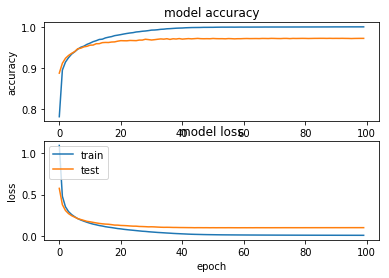

In [106]:
plt.figure(1)  
   
 # summarize history for accuracy  
   
plt.subplot(211)  
plt.plot(history.history['acc'])  
plt.plot(history.history['val_acc'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
#plt.legend(['train', 'test'], loc='upper left')  

# summarize history for loss  

plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left') 
plt.savefig(filename + '.png')
plt.show()  

###### Loading the Model

In [103]:
filename = "epochs_100_batchsize_50_sgd_momentum_0.1_784_sigmoid_100_sigmoid_10_softmax_crossentropy"

model = load_model(filename)

In [104]:
scores = model.evaluate(x_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

10000/10000 [==============================] - 1s 131us/step

acc: 97.23%
